# Proof that LSTM works better than GRU & RNN on Long Sequences by `Mr. Harshit Dawar!`

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Input, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def returnLabels(x, index1, index2, index3):
    # x is the sequence in this fucntion
    
    # Specifying the conditions below to categorise the points into 2 categories.
    if x[index1] < 0 and x[index2] < 0 and x[index3] < 0:
        return 1
    elif x[index1] < 0 and x[index2] > 0 and x[index3] > 0:
        return 1
    elif x[index1] > 0 and x[index2] > 0 and x[index3] < 0:
        return 1
    elif x[index1] > 0 and x[index2] < 0 and x[index3] > 0:
        return 1
    else:
        return 0

## Generating Shorter Sequences which are easy to remember

In [6]:
Sequence_Length = 9
data = []
labels = []

for i in range(5000):
    temp = np.random.randn(Sequence_Length)
    data.append(temp)
    
    # Using the Last 3 elements of the sequence for the category prediction which is easy!
    labels.append(returnLabels(temp, -1, -2, -3))
    
data, labels = np.array(data), np.array(labels)

## Building a AR Model with sigmoid activation function because it is classification problem & have only classes, & also sigmoid ranges from 0 to 1.

In [9]:
inputShape = Input(shape = (Sequence_Length, ))
LayerStack = Dense(1, activation = "sigmoid")(inputShape)

ARModel = Model(inputShape, LayerStack)
ARModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
ARModel.summary()

trainedModel = ARModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 0s 3ms/step - loss: 0.8907 - accuracy: 0.4776 - val_loss: 0.8733 - val_accuracy: 0.4808
Epoch 2/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8574 - accuracy: 0.4740 - val_loss: 0.8415 - val_accuracy: 0.4800
Epoch 3/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8271 - accuracy: 0.4768 - val_loss: 0.8129 - val_accuracy: 0.4832
Epoch 4/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8006 - accuracy: 0.478

79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5120 - val_loss: 0.6938 - val_accuracy: 0.4976
Epoch 55/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5144 - val_loss: 0.6939 - val_accuracy: 0.4940
Epoch 56/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5124 - val_loss: 0.6940 - val_accuracy: 0.4924
Epoch 57/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5048 - val_loss: 0.6941 - val_accuracy: 0.4900
Epoch 58/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5148 - val_loss: 0.6940 - val_accuracy: 0.4988
Epoch 59/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5080 - val_loss: 0.6941 - val_accuracy: 0.4960
Epoch 60/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5112 - val_loss: 0.6941 - val_accuracy: 0.4908
Epoch 61/300
79/79 

Epoch 112/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5048 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 113/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5080 - val_loss: 0.6941 - val_accuracy: 0.4940
Epoch 114/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5016 - val_loss: 0.6942 - val_accuracy: 0.4960
Epoch 115/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5108 - val_loss: 0.6942 - val_accuracy: 0.5028
Epoch 116/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5116 - val_loss: 0.6942 - val_accuracy: 0.5012
Epoch 117/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6940 - val_accuracy: 0.4992
Epoch 118/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6940 - val_accuracy: 0.4952

79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5152 - val_loss: 0.6939 - val_accuracy: 0.4928
Epoch 170/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5152 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 171/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5112 - val_loss: 0.6941 - val_accuracy: 0.4992
Epoch 172/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5144 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 173/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5124 - val_loss: 0.6942 - val_accuracy: 0.4912
Epoch 174/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5128 - val_loss: 0.6943 - val_accuracy: 0.4964
Epoch 175/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5028 - val_loss: 0.6942 - val_accuracy: 0.4996
Epoch 176/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5120 - val_loss: 0.6940 - val_accuracy: 0.4904
Epoch 227/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6941 - val_accuracy: 0.4964
Epoch 228/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5104 - val_loss: 0.6942 - val_accuracy: 0.4916
Epoch 229/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5068 - val_loss: 0.6941 - val_accuracy: 0.4944
Epoch 230/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5036 - val_loss: 0.6940 - val_accuracy: 0.4992
Epoch 231/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5116 - val_loss: 0.6940 - val_accuracy: 0.4952
Epoch 232/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5120 - val_loss: 0.6941 - val_accuracy: 0.4968
Epoch 233/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5072 - val_loss: 0.6939 - val_accuracy: 0.4976
Epoch 284/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5104 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 285/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5096 - val_loss: 0.6937 - val_accuracy: 0.4964
Epoch 286/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6940 - val_accuracy: 0.4976
Epoch 287/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5076 - val_loss: 0.6941 - val_accuracy: 0.4936
Epoch 288/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5044 - val_loss: 0.6941 - val_accuracy: 0.4908
Epoch 289/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4984 - val_loss: 0.6941 - val_accuracy: 0.4948
Epoch 290/300

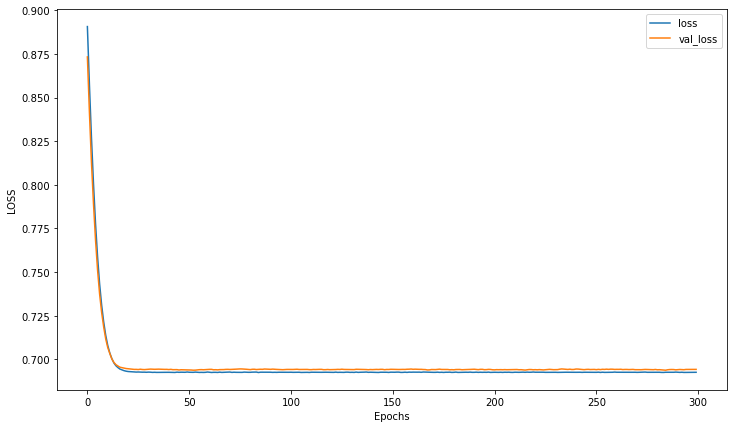

In [12]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

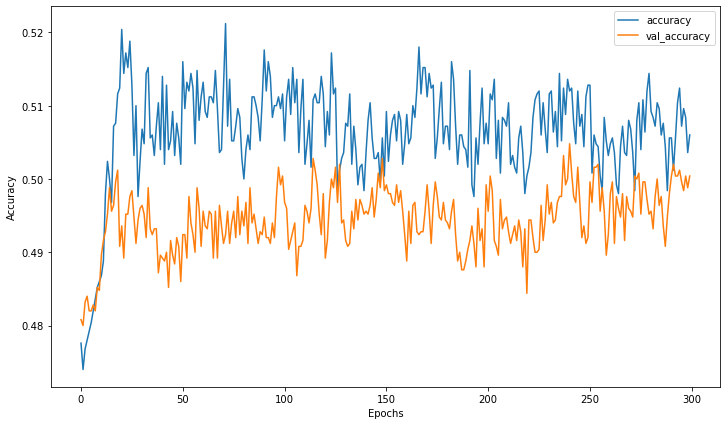

In [16]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***It is been seen that how poor the accuracy of the Simple Model is!***

## Generating SimpleRNN

In [20]:
# Resizing the Dataset to 3D for the RNN, LSTM, & GRU Working
data = data.reshape(-1, Sequence_Length, 1)    # Equivalent to data = np.expand_dims(data, -1)
data.shape

(5000, 9, 1)

In [22]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = SimpleRNN(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

RNNModel = Model(inputShape, LayerStack)
RNNModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
RNNModel.summary()

trainedModel = RNNModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 1s 8ms/step - loss: 0.7320 - accuracy: 0.5512 - val_loss: 0.7005 - val_accuracy: 0.5672
Epoch 2/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6907 - accuracy: 0.5688 - val_loss: 0.6815 - val_accuracy: 0.5672
Epoch 3/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6776 - accuracy: 0.5804 - val

79/79 [==============================] - 1s 7ms/step - loss: 0.1532 - accuracy: 0.9700 - val_loss: 0.1472 - val_accuracy: 0.9728
Epoch 54/300
79/79 [==============================] - 0s 6ms/step - loss: 0.1499 - accuracy: 0.9720 - val_loss: 0.1449 - val_accuracy: 0.9712
Epoch 55/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1472 - accuracy: 0.9720 - val_loss: 0.1423 - val_accuracy: 0.9716
Epoch 56/300
79/79 [==============================] - 0s 5ms/step - loss: 0.1448 - accuracy: 0.9720 - val_loss: 0.1405 - val_accuracy: 0.9712
Epoch 57/300
79/79 [==============================] - 0s 5ms/step - loss: 0.1422 - accuracy: 0.9752 - val_loss: 0.1381 - val_accuracy: 0.9740
Epoch 58/300
79/79 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9740 - val_loss: 0.1359 - val_accuracy: 0.9720
Epoch 59/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.9748 - val_loss: 0.1339 - val_accuracy: 0.9740
Epoch 60/300
79/79 

Epoch 111/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9864 - val_loss: 0.0764 - val_accuracy: 0.9840
Epoch 112/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0757 - accuracy: 0.9852 - val_loss: 0.0768 - val_accuracy: 0.9828
Epoch 113/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9868 - val_loss: 0.0757 - val_accuracy: 0.9836
Epoch 114/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0746 - accuracy: 0.9848 - val_loss: 0.0755 - val_accuracy: 0.9808
Epoch 115/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9872 - val_loss: 0.0749 - val_accuracy: 0.9840
Epoch 116/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9880 - val_loss: 0.0736 - val_accuracy: 0.9852
Epoch 117/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0727 - accuracy: 0.9844 - val_loss: 0.0747 - val_accuracy: 0.9820

79/79 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9900 - val_loss: 0.0574 - val_accuracy: 0.9864
Epoch 169/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9904 - val_loss: 0.0569 - val_accuracy: 0.9836
Epoch 170/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9920 - val_loss: 0.0555 - val_accuracy: 0.9876
Epoch 171/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0518 - accuracy: 0.9908 - val_loss: 0.0556 - val_accuracy: 0.9872
Epoch 172/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0511 - accuracy: 0.9908 - val_loss: 0.0558 - val_accuracy: 0.9872
Epoch 173/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9896 - val_loss: 0.0570 - val_accuracy: 0.9836
Epoch 174/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0511 - accuracy: 0.9892 - val_loss: 0.0554 - val_accuracy: 0.9876
Epoch 175/300

79/79 [==============================] - 0s 5ms/step - loss: 0.0408 - accuracy: 0.9932 - val_loss: 0.0462 - val_accuracy: 0.9892
Epoch 226/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0407 - accuracy: 0.9932 - val_loss: 0.0466 - val_accuracy: 0.9888
Epoch 227/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9932 - val_loss: 0.0486 - val_accuracy: 0.9888
Epoch 228/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.9924 - val_loss: 0.0468 - val_accuracy: 0.9884
Epoch 229/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9936 - val_loss: 0.0479 - val_accuracy: 0.9864
Epoch 230/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0403 - accuracy: 0.9932 - val_loss: 0.0477 - val_accuracy: 0.9880
Epoch 231/300
79/79 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9908 - val_loss: 0.0468 - val_accuracy: 0.9896
Epoch 232/300

79/79 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9932 - val_loss: 0.0433 - val_accuracy: 0.9884
Epoch 283/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9928 - val_loss: 0.0432 - val_accuracy: 0.9884
Epoch 284/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9944 - val_loss: 0.0405 - val_accuracy: 0.9876
Epoch 285/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9944 - val_loss: 0.0435 - val_accuracy: 0.9888
Epoch 286/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9936 - val_loss: 0.0401 - val_accuracy: 0.9884
Epoch 287/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9936 - val_loss: 0.0410 - val_accuracy: 0.9880
Epoch 288/300
79/79 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9932 - val_loss: 0.0399 - val_accuracy: 0.9880
Epoch 289/300

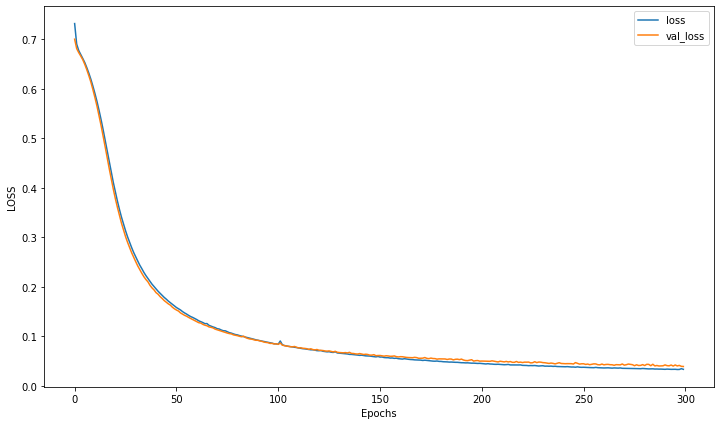

In [23]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

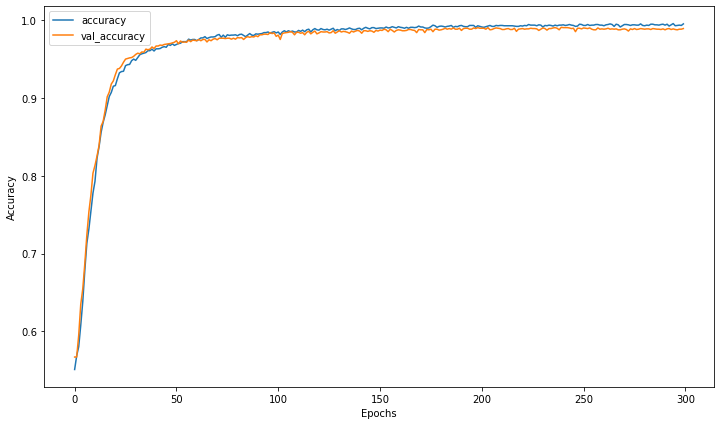

In [24]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating GRU

In [25]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = GRU(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

GRUModel = Model(inputShape, LayerStack)
GRUModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
GRUModel.summary()

trainedModel = GRUModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
gru (GRU)                    (None, 10)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 1s 13ms/step - loss: 0.6983 - accuracy: 0.5596 - val_loss: 0.6976 - val_accuracy: 0.5376
Epoch 2/300
79/79 [==============================] - 1s 8ms/step - loss: 0.6943 - accuracy: 0.5500 - val_loss: 0.6953 - val_accuracy: 0.5196
Epoch 3/300
79/79 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.5288 - v

79/79 [==============================] - 1s 7ms/step - loss: 0.1641 - accuracy: 0.9532 - val_loss: 0.1756 - val_accuracy: 0.9444
Epoch 54/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1589 - accuracy: 0.9552 - val_loss: 0.1720 - val_accuracy: 0.9468
Epoch 55/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1553 - accuracy: 0.9568 - val_loss: 0.1672 - val_accuracy: 0.9484
Epoch 56/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1501 - accuracy: 0.9576 - val_loss: 0.1627 - val_accuracy: 0.9488
Epoch 57/300
79/79 [==============================] - 1s 8ms/step - loss: 0.1456 - accuracy: 0.9612 - val_loss: 0.1585 - val_accuracy: 0.9492
Epoch 58/300
79/79 [==============================] - 1s 8ms/step - loss: 0.1417 - accuracy: 0.9596 - val_loss: 0.1542 - val_accuracy: 0.9520
Epoch 59/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1375 - accuracy: 0.9632 - val_loss: 0.1507 - val_accuracy: 0.9548
Epoch 60/300
79/79 

Epoch 111/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0438 - accuracy: 0.9912 - val_loss: 0.0631 - val_accuracy: 0.9792
Epoch 112/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0429 - accuracy: 0.9924 - val_loss: 0.0629 - val_accuracy: 0.9792
Epoch 113/300
79/79 [==============================] - 1s 8ms/step - loss: 0.0423 - accuracy: 0.9924 - val_loss: 0.0624 - val_accuracy: 0.9796
Epoch 114/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0415 - accuracy: 0.9912 - val_loss: 0.0618 - val_accuracy: 0.9808
Epoch 115/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0406 - accuracy: 0.9928 - val_loss: 0.0613 - val_accuracy: 0.9804
Epoch 116/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0401 - accuracy: 0.9916 - val_loss: 0.0607 - val_accuracy: 0.9808
Epoch 117/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0392 - accuracy: 0.9928 - val_loss: 0.0603 - val_accuracy: 0.9800

79/79 [==============================] - 1s 10ms/step - loss: 0.0168 - accuracy: 0.9968 - val_loss: 0.0449 - val_accuracy: 0.9836
Epoch 169/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0170 - accuracy: 0.9968 - val_loss: 0.0439 - val_accuracy: 0.9844
Epoch 170/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0164 - accuracy: 0.9972 - val_loss: 0.0439 - val_accuracy: 0.9836
Epoch 171/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0164 - accuracy: 0.9976 - val_loss: 0.0437 - val_accuracy: 0.9840
Epoch 172/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0160 - accuracy: 0.9972 - val_loss: 0.0437 - val_accuracy: 0.9844
Epoch 173/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0161 - accuracy: 0.9972 - val_loss: 0.0434 - val_accuracy: 0.9840
Epoch 174/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 0.0433 - val_accuracy: 0.9836
Epoch 175/30

79/79 [==============================] - 1s 8ms/step - loss: 0.0075 - accuracy: 0.9996 - val_loss: 0.0371 - val_accuracy: 0.9856
Epoch 226/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.0372 - val_accuracy: 0.9852
Epoch 227/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.0365 - val_accuracy: 0.9868
Epoch 228/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0073 - accuracy: 0.9996 - val_loss: 0.0366 - val_accuracy: 0.9860
Epoch 229/300
79/79 [==============================] - 1s 8ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.0369 - val_accuracy: 0.9864
Epoch 230/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9868
Epoch 231/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0070 - accuracy: 0.9996 - val_loss: 0.0373 - val_accuracy: 0.9860
Epoch 232/300

79/79 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9892
Epoch 283/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9892
Epoch 284/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 285/300
79/79 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 286/300
79/79 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9884
Epoch 287/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 0.9884
Epoch 288/300
79/79 [==============================] - 1s 12ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9884
Epoch 289/3

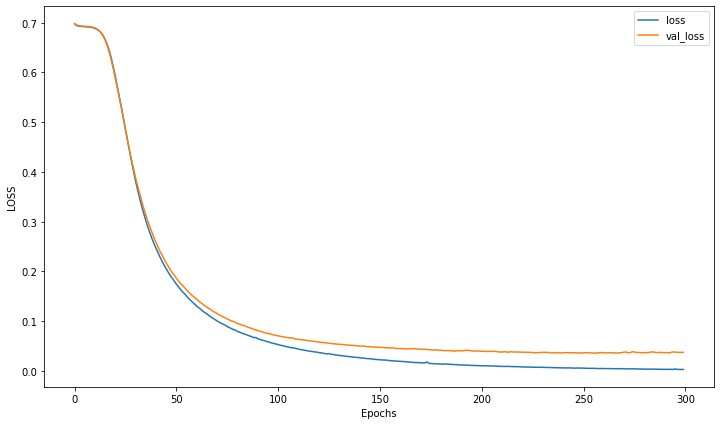

In [26]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

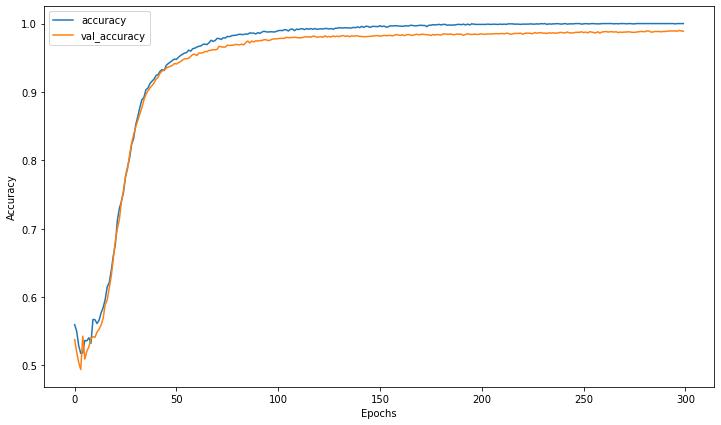

In [27]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating LSTM

In [28]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = LSTM(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
LSTMModel.summary()

trainedModel = LSTMModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 1s 15ms/step - loss: 0.6949 - accuracy: 0.5412 - val_loss: 0.6948 - val_accuracy: 0.5296
Epoch 2/300
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.5372 - val_loss: 0.6942 - val_accuracy: 0.5104
Epoch 3/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5292 - v

79/79 [==============================] - 1s 6ms/step - loss: 0.1142 - accuracy: 0.9720 - val_loss: 0.1166 - val_accuracy: 0.9672
Epoch 54/300
79/79 [==============================] - 1s 8ms/step - loss: 0.1102 - accuracy: 0.9756 - val_loss: 0.1127 - val_accuracy: 0.9672
Epoch 55/300
79/79 [==============================] - 1s 7ms/step - loss: 0.1066 - accuracy: 0.9760 - val_loss: 0.1100 - val_accuracy: 0.9668
Epoch 56/300
79/79 [==============================] - 1s 6ms/step - loss: 0.1031 - accuracy: 0.9780 - val_loss: 0.1066 - val_accuracy: 0.9680
Epoch 57/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0998 - accuracy: 0.9772 - val_loss: 0.1045 - val_accuracy: 0.9668
Epoch 58/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0971 - accuracy: 0.9788 - val_loss: 0.1019 - val_accuracy: 0.9664
Epoch 59/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0944 - accuracy: 0.9788 - val_loss: 0.0991 - val_accuracy: 0.9692
Epoch 60/300
79/79 

Epoch 111/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0300 - accuracy: 0.9940 - val_loss: 0.0471 - val_accuracy: 0.9840
Epoch 112/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0299 - accuracy: 0.9936 - val_loss: 0.0477 - val_accuracy: 0.9824
Epoch 113/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0289 - accuracy: 0.9960 - val_loss: 0.0458 - val_accuracy: 0.9852
Epoch 114/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0283 - accuracy: 0.9960 - val_loss: 0.0461 - val_accuracy: 0.9836
Epoch 115/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0277 - accuracy: 0.9948 - val_loss: 0.0456 - val_accuracy: 0.9840
Epoch 116/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0273 - accuracy: 0.9944 - val_loss: 0.0459 - val_accuracy: 0.9836
Epoch 117/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0270 - accuracy: 0.9952 - val_loss: 0.0448 - val_accuracy: 0.9848

79/79 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.9988 - val_loss: 0.0355 - val_accuracy: 0.9860
Epoch 169/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0116 - accuracy: 0.9992 - val_loss: 0.0363 - val_accuracy: 0.9860
Epoch 170/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0115 - accuracy: 0.9988 - val_loss: 0.0356 - val_accuracy: 0.9860
Epoch 171/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0115 - accuracy: 0.9988 - val_loss: 0.0350 - val_accuracy: 0.9864
Epoch 172/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0112 - accuracy: 0.9992 - val_loss: 0.0359 - val_accuracy: 0.9860
Epoch 173/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0112 - accuracy: 0.9984 - val_loss: 0.0354 - val_accuracy: 0.9864
Epoch 174/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9992 - val_loss: 0.0365 - val_accuracy: 0.9860
Epoch 175/300

79/79 [==============================] - 1s 7ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0374 - val_accuracy: 0.9880
Epoch 226/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 227/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9884
Epoch 228/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 0.9880
Epoch 229/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 0.9880
Epoch 230/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 231/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 232/300

79/79 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9892
Epoch 283/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9892
Epoch 284/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9892
Epoch 285/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9896
Epoch 286/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9880
Epoch 287/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9888
Epoch 288/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9868
Epoch 289/300

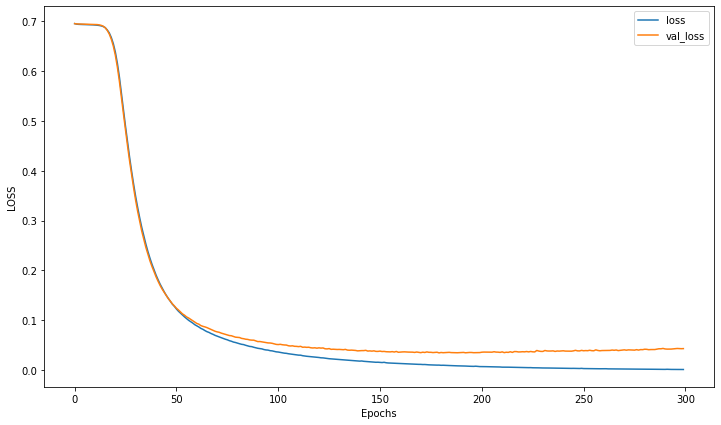

In [29]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

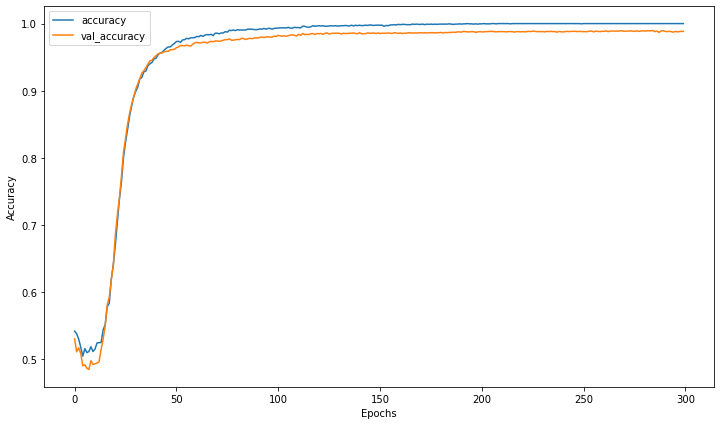

In [31]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Till here RNN, GRU, & LSTM all perform well, now, lets generate some complex sequence***

In [33]:
Sequence_Length = 9
data = []
labels = []

for i in range(5000):
    temp = np.random.randn(Sequence_Length)
    data.append(temp)
    
    # Using the first 3 elements of the sequence for the category prediction which is difficult!
    labels.append(returnLabels(temp, 0, 1, 2))
    
data, labels = np.array(data), np.array(labels)

## Generating AR Model

In [34]:
inputShape = Input(shape = (Sequence_Length, ))
LayerStack = Dense(1, activation = "sigmoid")(inputShape)

ARModel = Model(inputShape, LayerStack)
ARModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
ARModel.summary()

trainedModel = ARModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 0s 3ms/step - loss: 0.8434 - accuracy: 0.5048 - val_loss: 0.8398 - val_accuracy: 0.4888
Epoch 2/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8161 - accuracy: 0.5040 - val_loss: 0.8133 - val_accuracy: 0.4876
Epoch 3/300
79/79 [==============================] - 0s 2ms/step - loss: 0.7929 - accuracy: 0.5048 - val_loss: 0.7907 - val_accuracy: 0.4880
Epoch 4/300
79/79 [==============================] - 0s 3ms/step - loss: 0.7725 - accuracy: 0.50

79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5228 - val_loss: 0.6952 - val_accuracy: 0.5040
Epoch 55/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5204 - val_loss: 0.6951 - val_accuracy: 0.5004
Epoch 56/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5136 - val_loss: 0.6951 - val_accuracy: 0.5028
Epoch 57/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5152 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 58/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5184 - val_loss: 0.6954 - val_accuracy: 0.4992
Epoch 59/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5228 - val_loss: 0.6953 - val_accuracy: 0.5004
Epoch 60/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5232 - val_loss: 0.6954 - val_accuracy: 0.5016
Epoch 61/300
79/79 

Epoch 112/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5192 - val_loss: 0.6950 - val_accuracy: 0.4992
Epoch 113/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5216 - val_loss: 0.6951 - val_accuracy: 0.4964
Epoch 114/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5168 - val_loss: 0.6950 - val_accuracy: 0.4964
Epoch 115/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5216 - val_loss: 0.6952 - val_accuracy: 0.4956
Epoch 116/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5200 - val_loss: 0.6951 - val_accuracy: 0.4932
Epoch 117/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5192 - val_loss: 0.6951 - val_accuracy: 0.4960
Epoch 118/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5220 - val_loss: 0.6953 - val_accuracy: 0.4936

79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5224 - val_loss: 0.6956 - val_accuracy: 0.5004
Epoch 170/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5212 - val_loss: 0.6956 - val_accuracy: 0.5024
Epoch 171/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5256 - val_loss: 0.6955 - val_accuracy: 0.5068
Epoch 172/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5252 - val_loss: 0.6958 - val_accuracy: 0.5032
Epoch 173/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5200 - val_loss: 0.6956 - val_accuracy: 0.5040
Epoch 174/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5252 - val_loss: 0.6955 - val_accuracy: 0.5016
Epoch 175/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5240 - val_loss: 0.6954 - val_accuracy: 0.5008
Epoch 176/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5192 - val_loss: 0.6956 - val_accuracy: 0.5024
Epoch 227/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5208 - val_loss: 0.6956 - val_accuracy: 0.5020
Epoch 228/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5256 - val_loss: 0.6954 - val_accuracy: 0.5036
Epoch 229/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5244 - val_loss: 0.6955 - val_accuracy: 0.5024
Epoch 230/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5204 - val_loss: 0.6952 - val_accuracy: 0.4996
Epoch 231/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5228 - val_loss: 0.6953 - val_accuracy: 0.5012
Epoch 232/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5240 - val_loss: 0.6953 - val_accuracy: 0.4996
Epoch 233/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5224 - val_loss: 0.6954 - val_accuracy: 0.5040
Epoch 284/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5216 - val_loss: 0.6954 - val_accuracy: 0.4984
Epoch 285/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5264 - val_loss: 0.6953 - val_accuracy: 0.4984
Epoch 286/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5244 - val_loss: 0.6952 - val_accuracy: 0.4984
Epoch 287/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.5260 - val_loss: 0.6952 - val_accuracy: 0.4948
Epoch 288/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5240 - val_loss: 0.6953 - val_accuracy: 0.4988
Epoch 289/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5224 - val_loss: 0.6953 - val_accuracy: 0.4980
Epoch 290/300

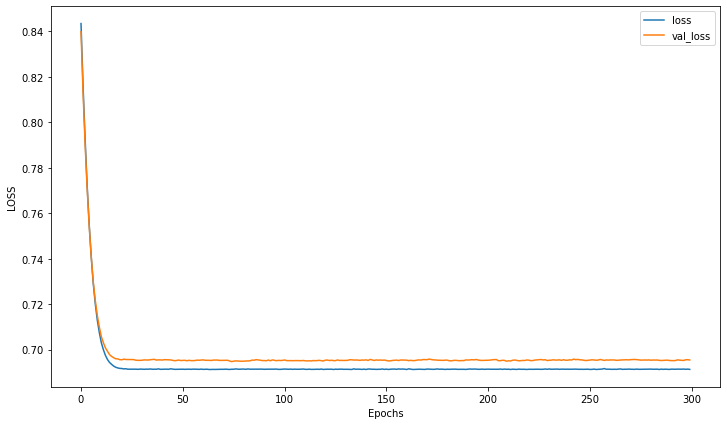

In [35]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

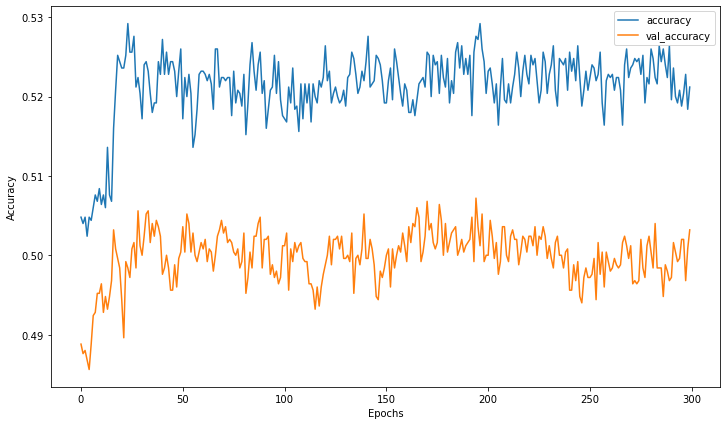

In [36]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating SimpleRNN

In [37]:
# Resizing the Dataset to 3D for the RNN, LSTM, & GRU Working
data = np.expand_dims(data, -1)
data.shape

(5000, 9, 1)

In [38]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = SimpleRNN(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

RNNModel = Model(inputShape, LayerStack)
RNNModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
RNNModel.summary()

trainedModel = RNNModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 1s 7ms/step - loss: 0.7153 - accuracy: 0.5152 - val_loss: 0.7121 - val_accuracy: 0.4888
Epoch 2/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6998 - accuracy: 0.5208 - val_loss: 0.7040 - val_accuracy: 0.4888
Epoch 3/300
79/79 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5276 - va

79/79 [==============================] - 0s 5ms/step - loss: 0.3594 - accuracy: 0.8344 - val_loss: 0.3774 - val_accuracy: 0.8344
Epoch 54/300
79/79 [==============================] - 0s 4ms/step - loss: 0.3622 - accuracy: 0.8288 - val_loss: 0.3791 - val_accuracy: 0.8264
Epoch 55/300
79/79 [==============================] - 0s 4ms/step - loss: 0.3577 - accuracy: 0.8348 - val_loss: 0.3913 - val_accuracy: 0.8188
Epoch 56/300
79/79 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.8380 - val_loss: 0.4638 - val_accuracy: 0.7856
Epoch 57/300
79/79 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8316 - val_loss: 0.3779 - val_accuracy: 0.8260
Epoch 58/300
79/79 [==============================] - 0s 4ms/step - loss: 0.3464 - accuracy: 0.8376 - val_loss: 0.3873 - val_accuracy: 0.8244
Epoch 59/300
79/79 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8408 - val_loss: 0.3993 - val_accuracy: 0.8220
Epoch 60/300
79/79 

Epoch 111/300
79/79 [==============================] - 0s 5ms/step - loss: 0.2573 - accuracy: 0.8900 - val_loss: 0.2989 - val_accuracy: 0.8704
Epoch 112/300
79/79 [==============================] - 0s 5ms/step - loss: 0.2582 - accuracy: 0.8888 - val_loss: 0.3026 - val_accuracy: 0.8752
Epoch 113/300
79/79 [==============================] - 0s 5ms/step - loss: 0.2554 - accuracy: 0.8864 - val_loss: 0.3290 - val_accuracy: 0.8584
Epoch 114/300
79/79 [==============================] - 0s 6ms/step - loss: 0.2519 - accuracy: 0.8936 - val_loss: 0.3113 - val_accuracy: 0.8620
Epoch 115/300
79/79 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.8888 - val_loss: 0.3131 - val_accuracy: 0.8708
Epoch 116/300
79/79 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.8884 - val_loss: 0.2913 - val_accuracy: 0.8740
Epoch 117/300
79/79 [==============================] - 1s 7ms/step - loss: 0.2528 - accuracy: 0.8872 - val_loss: 0.2952 - val_accuracy: 0.8764

79/79 [==============================] - 0s 4ms/step - loss: 0.2024 - accuracy: 0.9108 - val_loss: 0.2578 - val_accuracy: 0.8904
Epoch 169/300
79/79 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.9092 - val_loss: 0.2351 - val_accuracy: 0.9076
Epoch 170/300
79/79 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.9148 - val_loss: 0.2561 - val_accuracy: 0.8932
Epoch 171/300
79/79 [==============================] - 0s 6ms/step - loss: 0.2031 - accuracy: 0.9128 - val_loss: 0.2383 - val_accuracy: 0.9064
Epoch 172/300
79/79 [==============================] - 0s 4ms/step - loss: 0.2025 - accuracy: 0.9112 - val_loss: 0.2346 - val_accuracy: 0.9060
Epoch 173/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1992 - accuracy: 0.9128 - val_loss: 0.2344 - val_accuracy: 0.9064
Epoch 174/300
79/79 [==============================] - 0s 6ms/step - loss: 0.1914 - accuracy: 0.9160 - val_loss: 0.2351 - val_accuracy: 0.9000
Epoch 175/300

79/79 [==============================] - 1s 6ms/step - loss: 0.1564 - accuracy: 0.9320 - val_loss: 0.1820 - val_accuracy: 0.9304
Epoch 226/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1693 - accuracy: 0.9264 - val_loss: 0.1945 - val_accuracy: 0.9236
Epoch 227/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1490 - accuracy: 0.9364 - val_loss: 0.1872 - val_accuracy: 0.9272
Epoch 228/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1550 - accuracy: 0.9308 - val_loss: 0.1825 - val_accuracy: 0.9304
Epoch 229/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 0.9332 - val_loss: 0.1808 - val_accuracy: 0.9232
Epoch 230/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1482 - accuracy: 0.9380 - val_loss: 0.1912 - val_accuracy: 0.9264
Epoch 231/300
79/79 [==============================] - 0s 5ms/step - loss: 0.1484 - accuracy: 0.9384 - val_loss: 0.1838 - val_accuracy: 0.9304
Epoch 232/300

79/79 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9460 - val_loss: 0.1605 - val_accuracy: 0.9408
Epoch 283/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.9472 - val_loss: 0.1507 - val_accuracy: 0.9432
Epoch 284/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1222 - accuracy: 0.9500 - val_loss: 0.1655 - val_accuracy: 0.9392
Epoch 285/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1213 - accuracy: 0.9476 - val_loss: 0.1549 - val_accuracy: 0.9440
Epoch 286/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1185 - accuracy: 0.9480 - val_loss: 0.1527 - val_accuracy: 0.9424
Epoch 287/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1161 - accuracy: 0.9528 - val_loss: 0.1462 - val_accuracy: 0.9480
Epoch 288/300
79/79 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9516 - val_loss: 0.1500 - val_accuracy: 0.9460
Epoch 289/300

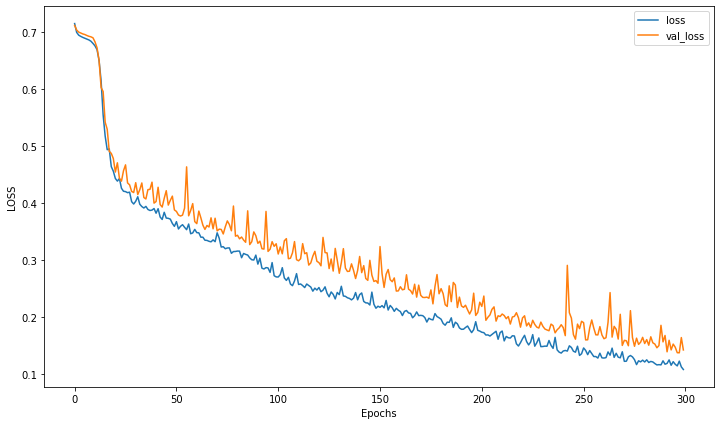

In [39]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

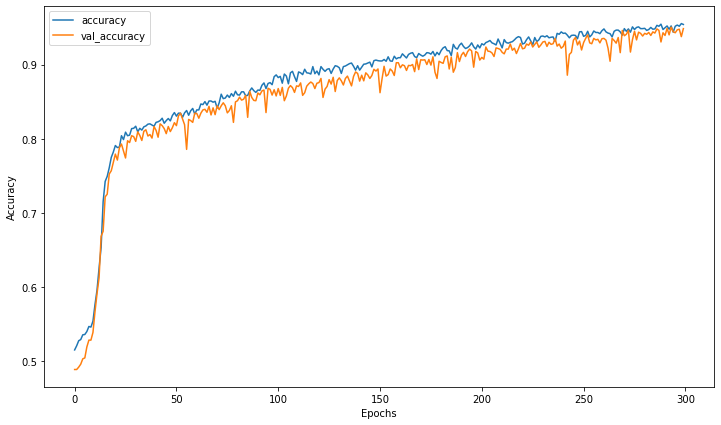

In [40]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating GRU

In [41]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = GRU(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

GRUModel = Model(inputShape, LayerStack)
GRUModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
GRUModel.summary()

trainedModel = GRUModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 9, 1)]            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 10)                390       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 1s 12ms/step - loss: 0.7008 - accuracy: 0.5084 - val_loss: 0.6999 - val_accuracy: 0.4820
Epoch 2/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6950 - accuracy: 0.5160 - val_loss: 0.6966 - val_accuracy: 0.4932
Epoch 3/300
79/79 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.5048 - v

79/79 [==============================] - 1s 7ms/step - loss: 0.6909 - accuracy: 0.5228 - val_loss: 0.6950 - val_accuracy: 0.5060
Epoch 54/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6912 - accuracy: 0.5232 - val_loss: 0.6950 - val_accuracy: 0.5080
Epoch 55/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6910 - accuracy: 0.5208 - val_loss: 0.6954 - val_accuracy: 0.4940
Epoch 56/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6908 - accuracy: 0.5228 - val_loss: 0.6949 - val_accuracy: 0.5064
Epoch 57/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6907 - accuracy: 0.5188 - val_loss: 0.6948 - val_accuracy: 0.5080
Epoch 58/300
79/79 [==============================] - 1s 10ms/step - loss: 0.6908 - accuracy: 0.5240 - val_loss: 0.6951 - val_accuracy: 0.5056
Epoch 59/300
79/79 [==============================] - 1s 12ms/step - loss: 0.6906 - accuracy: 0.5212 - val_loss: 0.6952 - val_accuracy: 0.4988
Epoch 60/300
79/7

79/79 [==============================] - 1s 6ms/step - loss: 0.3723 - accuracy: 0.8516 - val_loss: 0.3766 - val_accuracy: 0.8468
Epoch 111/300
79/79 [==============================] - 1s 6ms/step - loss: 0.3569 - accuracy: 0.8560 - val_loss: 0.3640 - val_accuracy: 0.8548
Epoch 112/300
79/79 [==============================] - 1s 6ms/step - loss: 0.3456 - accuracy: 0.8604 - val_loss: 0.3548 - val_accuracy: 0.8584
Epoch 113/300
79/79 [==============================] - 1s 6ms/step - loss: 0.3315 - accuracy: 0.8700 - val_loss: 0.3441 - val_accuracy: 0.8676
Epoch 114/300
79/79 [==============================] - 1s 6ms/step - loss: 0.3227 - accuracy: 0.8748 - val_loss: 0.3343 - val_accuracy: 0.8696
Epoch 115/300
79/79 [==============================] - 1s 6ms/step - loss: 0.3095 - accuracy: 0.8780 - val_loss: 0.3285 - val_accuracy: 0.8728
Epoch 116/300
79/79 [==============================] - 1s 6ms/step - loss: 0.2971 - accuracy: 0.8864 - val_loss: 0.3093 - val_accuracy: 0.8808
Epoch 117/300

79/79 [==============================] - 0s 6ms/step - loss: 0.0910 - accuracy: 0.9676 - val_loss: 0.1157 - val_accuracy: 0.9592
Epoch 168/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0905 - accuracy: 0.9668 - val_loss: 0.1084 - val_accuracy: 0.9636
Epoch 169/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0915 - accuracy: 0.9660 - val_loss: 0.1058 - val_accuracy: 0.9644
Epoch 170/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0882 - accuracy: 0.9648 - val_loss: 0.1064 - val_accuracy: 0.9628
Epoch 171/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0883 - accuracy: 0.9676 - val_loss: 0.1098 - val_accuracy: 0.9620
Epoch 172/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0860 - accuracy: 0.9684 - val_loss: 0.1011 - val_accuracy: 0.9664
Epoch 173/300
79/79 [==============================] - 1s 6ms/step - loss: 0.0847 - accuracy: 0.9688 - val_loss: 0.1033 - val_accuracy: 0.9640
Epoch 174/300

79/79 [==============================] - 1s 7ms/step - loss: 0.0419 - accuracy: 0.9848 - val_loss: 0.0667 - val_accuracy: 0.9756
Epoch 225/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0380 - accuracy: 0.9868 - val_loss: 0.0669 - val_accuracy: 0.9768
Epoch 226/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0644 - val_accuracy: 0.9768
Epoch 227/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0371 - accuracy: 0.9872 - val_loss: 0.0640 - val_accuracy: 0.9804
Epoch 228/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0379 - accuracy: 0.9868 - val_loss: 0.0645 - val_accuracy: 0.9748
Epoch 229/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0625 - val_accuracy: 0.9784
Epoch 230/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.0653 - val_accuracy: 0.9752
Epoch 231/300

79/79 [==============================] - 1s 7ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 0.0546 - val_accuracy: 0.9816
Epoch 282/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 0.0539 - val_accuracy: 0.9852
Epoch 283/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0125 - accuracy: 0.9976 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 284/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0126 - accuracy: 0.9968 - val_loss: 0.0556 - val_accuracy: 0.9852
Epoch 285/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0136 - accuracy: 0.9968 - val_loss: 0.0556 - val_accuracy: 0.9848
Epoch 286/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0149 - accuracy: 0.9944 - val_loss: 0.0535 - val_accuracy: 0.9844
Epoch 287/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0121 - accuracy: 0.9976 - val_loss: 0.0499 - val_accuracy: 0.9848
Epoch 288/300

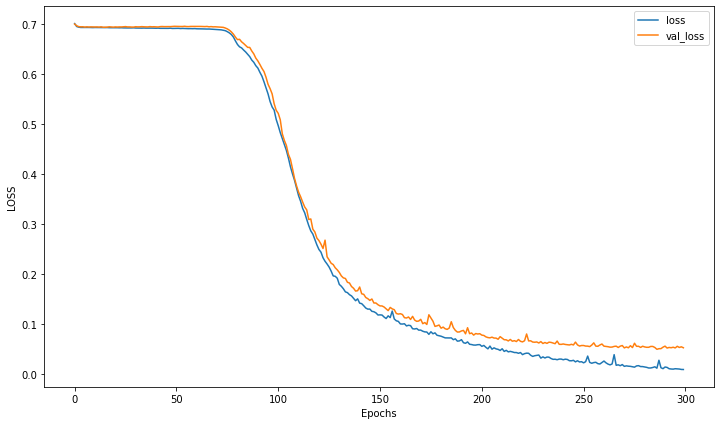

In [42]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

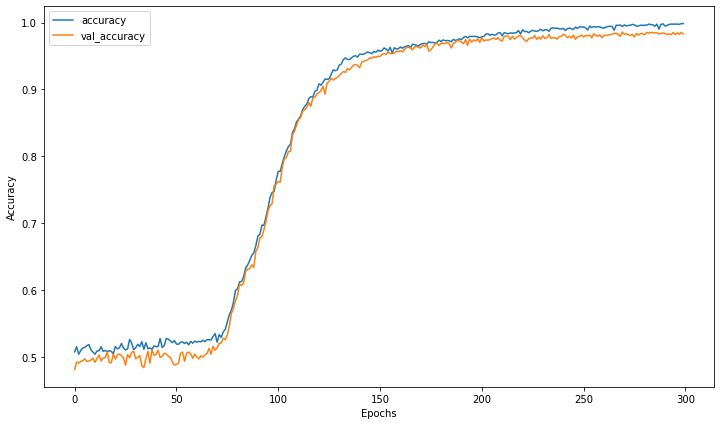

In [43]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating LSTM

In [44]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = LSTM(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
LSTMModel.summary()

trainedModel = LSTMModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 9, 1)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 1s 12ms/step - loss: 0.6947 - accuracy: 0.5040 - val_loss: 0.6927 - val_accuracy: 0.5088
Epoch 2/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.5196 - val_loss: 0.6929 - val_accuracy: 0.5104
Epoch 3/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5112 - v

79/79 [==============================] - 0s 6ms/step - loss: 0.5071 - accuracy: 0.7640 - val_loss: 0.5021 - val_accuracy: 0.7676
Epoch 54/300
79/79 [==============================] - 1s 6ms/step - loss: 0.4994 - accuracy: 0.7628 - val_loss: 0.4992 - val_accuracy: 0.7652
Epoch 55/300
79/79 [==============================] - 0s 6ms/step - loss: 0.4927 - accuracy: 0.7728 - val_loss: 0.4912 - val_accuracy: 0.7736
Epoch 56/300
79/79 [==============================] - 0s 6ms/step - loss: 0.4838 - accuracy: 0.7804 - val_loss: 0.4880 - val_accuracy: 0.7728
Epoch 57/300
79/79 [==============================] - 0s 6ms/step - loss: 0.4786 - accuracy: 0.7808 - val_loss: 0.4932 - val_accuracy: 0.7720
Epoch 58/300
79/79 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.7860 - val_loss: 0.4724 - val_accuracy: 0.7868
Epoch 59/300
79/79 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.7936 - val_loss: 0.4703 - val_accuracy: 0.7888
Epoch 60/300
79/79 

Epoch 111/300
79/79 [==============================] - 0s 6ms/step - loss: 0.2497 - accuracy: 0.9020 - val_loss: 0.2929 - val_accuracy: 0.8824
Epoch 112/300
79/79 [==============================] - 0s 6ms/step - loss: 0.2493 - accuracy: 0.9036 - val_loss: 0.2813 - val_accuracy: 0.8900
Epoch 113/300
79/79 [==============================] - 0s 6ms/step - loss: 0.2432 - accuracy: 0.9084 - val_loss: 0.2894 - val_accuracy: 0.8816
Epoch 114/300
79/79 [==============================] - 0s 6ms/step - loss: 0.2443 - accuracy: 0.9060 - val_loss: 0.2783 - val_accuracy: 0.8880
Epoch 115/300
79/79 [==============================] - 0s 6ms/step - loss: 0.2434 - accuracy: 0.9068 - val_loss: 0.2752 - val_accuracy: 0.8904
Epoch 116/300
79/79 [==============================] - 0s 6ms/step - loss: 0.2383 - accuracy: 0.9100 - val_loss: 0.2683 - val_accuracy: 0.8924
Epoch 117/300
79/79 [==============================] - 0s 6ms/step - loss: 0.2338 - accuracy: 0.9092 - val_loss: 0.2793 - val_accuracy: 0.8880

79/79 [==============================] - 0s 6ms/step - loss: 0.1265 - accuracy: 0.9548 - val_loss: 0.1615 - val_accuracy: 0.9392
Epoch 169/300
79/79 [==============================] - 0s 6ms/step - loss: 0.1301 - accuracy: 0.9540 - val_loss: 0.1606 - val_accuracy: 0.9420
Epoch 170/300
79/79 [==============================] - 0s 6ms/step - loss: 0.1239 - accuracy: 0.9572 - val_loss: 0.1556 - val_accuracy: 0.9460
Epoch 171/300
79/79 [==============================] - 0s 6ms/step - loss: 0.1263 - accuracy: 0.9552 - val_loss: 0.1634 - val_accuracy: 0.9400
Epoch 172/300
79/79 [==============================] - 0s 6ms/step - loss: 0.1232 - accuracy: 0.9564 - val_loss: 0.1551 - val_accuracy: 0.9452
Epoch 173/300
79/79 [==============================] - 0s 6ms/step - loss: 0.1197 - accuracy: 0.9596 - val_loss: 0.1528 - val_accuracy: 0.9448
Epoch 174/300
79/79 [==============================] - 0s 6ms/step - loss: 0.1178 - accuracy: 0.9588 - val_loss: 0.1849 - val_accuracy: 0.9348
Epoch 175/300

79/79 [==============================] - 1s 9ms/step - loss: 0.0676 - accuracy: 0.9760 - val_loss: 0.1028 - val_accuracy: 0.9700
Epoch 226/300
79/79 [==============================] - 1s 12ms/step - loss: 0.0700 - accuracy: 0.9744 - val_loss: 0.1015 - val_accuracy: 0.9656
Epoch 227/300
79/79 [==============================] - 1s 11ms/step - loss: 0.0698 - accuracy: 0.9736 - val_loss: 0.0961 - val_accuracy: 0.9660
Epoch 228/300
79/79 [==============================] - 1s 11ms/step - loss: 0.0659 - accuracy: 0.9772 - val_loss: 0.1005 - val_accuracy: 0.9680
Epoch 229/300
79/79 [==============================] - 1s 8ms/step - loss: 0.0636 - accuracy: 0.9792 - val_loss: 0.1038 - val_accuracy: 0.9668
Epoch 230/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0634 - accuracy: 0.9772 - val_loss: 0.0997 - val_accuracy: 0.9680
Epoch 231/300
79/79 [==============================] - 1s 14ms/step - loss: 0.0650 - accuracy: 0.9780 - val_loss: 0.0940 - val_accuracy: 0.9656
Epoch 232

79/79 [==============================] - 1s 7ms/step - loss: 0.0337 - accuracy: 0.9840 - val_loss: 0.0734 - val_accuracy: 0.9768
Epoch 283/300
79/79 [==============================] - 1s 8ms/step - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.0791 - val_accuracy: 0.9720
Epoch 284/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0306 - accuracy: 0.9896 - val_loss: 0.0721 - val_accuracy: 0.9780
Epoch 285/300
79/79 [==============================] - 1s 9ms/step - loss: 0.0306 - accuracy: 0.9884 - val_loss: 0.0759 - val_accuracy: 0.9756
Epoch 286/300
79/79 [==============================] - 0s 6ms/step - loss: 0.0297 - accuracy: 0.9884 - val_loss: 0.0716 - val_accuracy: 0.9788
Epoch 287/300
79/79 [==============================] - 1s 7ms/step - loss: 0.0311 - accuracy: 0.9884 - val_loss: 0.0691 - val_accuracy: 0.9800
Epoch 288/300
79/79 [==============================] - 1s 8ms/step - loss: 0.0296 - accuracy: 0.9884 - val_loss: 0.0661 - val_accuracy: 0.9800
Epoch 289/300

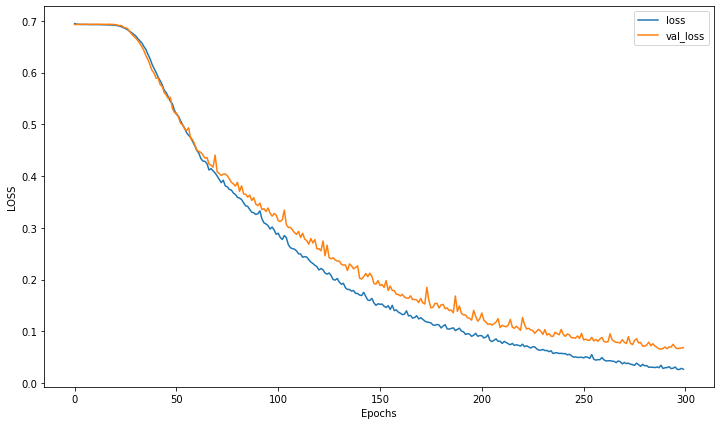

In [45]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

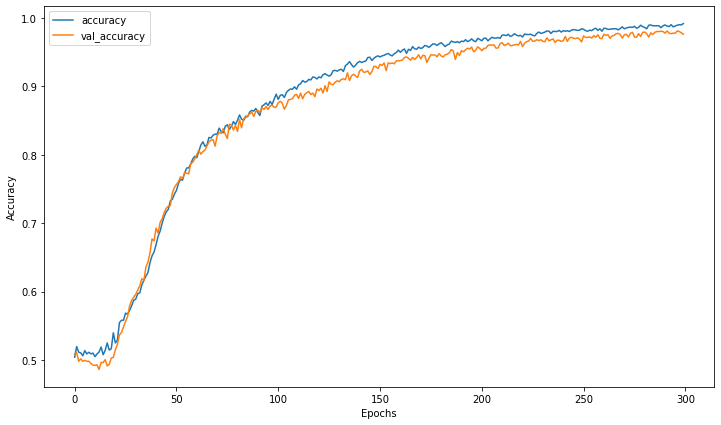

In [46]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Generating a very long sequence!

In [47]:
Sequence_Length = 35
data = []
labels = []

for i in range(5000):
    temp = np.random.randn(Sequence_Length)
    data.append(temp)
    
    # Using the first 3 elements of the sequence for the category prediction which is difficult!
    labels.append(returnLabels(temp, 0, 1, 2))
    
data, labels = np.array(data), np.array(labels)

## AR Model

In [48]:
inputShape = Input(shape = (Sequence_Length, ))
LayerStack = Dense(1, activation = "sigmoid")(inputShape)

ARModel = Model(inputShape, LayerStack)
ARModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
ARModel.summary()

trainedModel = ARModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 35)]              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 36        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 0s 3ms/step - loss: 0.9122 - accuracy: 0.5168 - val_loss: 0.9591 - val_accuracy: 0.4788
Epoch 2/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8684 - accuracy: 0.5196 - val_loss: 0.9119 - val_accuracy: 0.4792
Epoch 3/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8302 - accuracy: 0.5152 - val_loss: 0.8709 - val_accuracy: 0.4788
Epoch 4/300
79/79 [==============================] - 0s 2ms/step - loss: 0.7987 - accuracy: 0.51

79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5412 - val_loss: 0.7021 - val_accuracy: 0.4972
Epoch 55/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5404 - val_loss: 0.7022 - val_accuracy: 0.5004
Epoch 56/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5396 - val_loss: 0.7016 - val_accuracy: 0.4980
Epoch 57/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5372 - val_loss: 0.7017 - val_accuracy: 0.4984
Epoch 58/300
79/79 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5420 - val_loss: 0.7016 - val_accuracy: 0.4976
Epoch 59/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5392 - val_loss: 0.7019 - val_accuracy: 0.4984
Epoch 60/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5380 - val_loss: 0.7018 - val_accuracy: 0.4976
Epoch 61/300
79/79 

Epoch 112/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5380 - val_loss: 0.7017 - val_accuracy: 0.4944
Epoch 113/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5404 - val_loss: 0.7015 - val_accuracy: 0.4992
Epoch 114/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5356 - val_loss: 0.7018 - val_accuracy: 0.4980
Epoch 115/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5388 - val_loss: 0.7020 - val_accuracy: 0.4992
Epoch 116/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5384 - val_loss: 0.7020 - val_accuracy: 0.5012
Epoch 117/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5424 - val_loss: 0.7022 - val_accuracy: 0.4972
Epoch 118/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5340 - val_loss: 0.7020 - val_accuracy: 0.4996

79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5380 - val_loss: 0.7018 - val_accuracy: 0.4996
Epoch 170/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5340 - val_loss: 0.7019 - val_accuracy: 0.4972
Epoch 171/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5376 - val_loss: 0.7020 - val_accuracy: 0.4952
Epoch 172/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5356 - val_loss: 0.7021 - val_accuracy: 0.4964
Epoch 173/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5320 - val_loss: 0.7016 - val_accuracy: 0.4952
Epoch 174/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5400 - val_loss: 0.7015 - val_accuracy: 0.4980
Epoch 175/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5360 - val_loss: 0.7016 - val_accuracy: 0.5024
Epoch 176/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5396 - val_loss: 0.7017 - val_accuracy: 0.4992
Epoch 227/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5400 - val_loss: 0.7015 - val_accuracy: 0.5008
Epoch 228/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5372 - val_loss: 0.7017 - val_accuracy: 0.4956
Epoch 229/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5360 - val_loss: 0.7016 - val_accuracy: 0.4960
Epoch 230/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5376 - val_loss: 0.7017 - val_accuracy: 0.4984
Epoch 231/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5444 - val_loss: 0.7015 - val_accuracy: 0.4948
Epoch 232/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5428 - val_loss: 0.7018 - val_accuracy: 0.4964
Epoch 233/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5356 - val_loss: 0.7023 - val_accuracy: 0.5004
Epoch 284/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5412 - val_loss: 0.7021 - val_accuracy: 0.5032
Epoch 285/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5400 - val_loss: 0.7023 - val_accuracy: 0.5004
Epoch 286/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5368 - val_loss: 0.7020 - val_accuracy: 0.4976
Epoch 287/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5428 - val_loss: 0.7022 - val_accuracy: 0.5020
Epoch 288/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5388 - val_loss: 0.7019 - val_accuracy: 0.4996
Epoch 289/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5376 - val_loss: 0.7016 - val_accuracy: 0.5044
Epoch 290/300

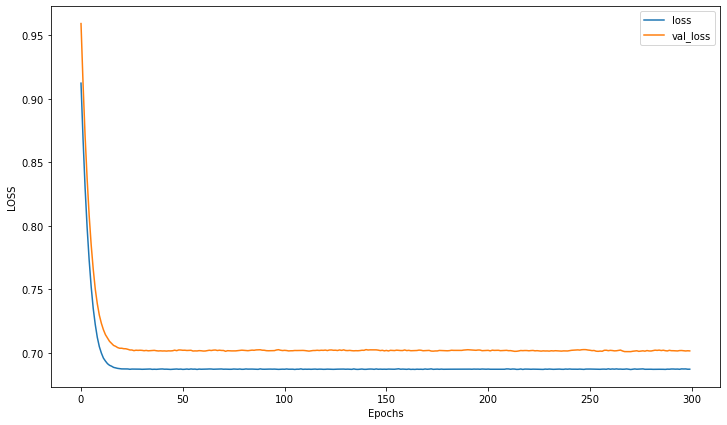

In [49]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

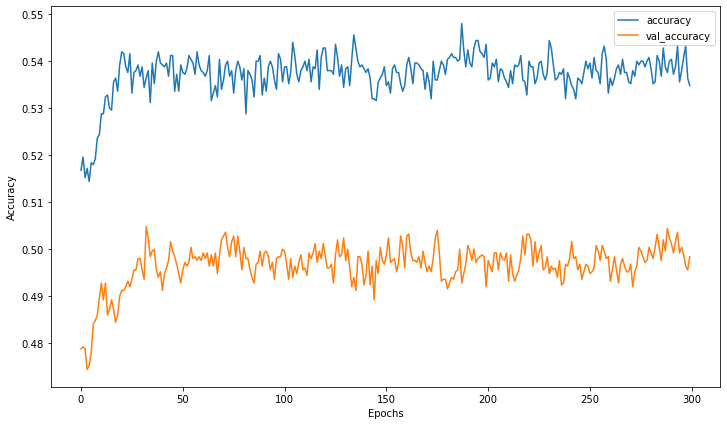

In [50]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Simple RNN

In [51]:
# Resizing the Dataset to 3D for the RNN, LSTM, & GRU Working
data = np.expand_dims(data, -1)
data.shape

(5000, 35, 1)

In [52]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = SimpleRNN(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

RNNModel = Model(inputShape, LayerStack)
RNNModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
RNNModel.summary()

trainedModel = RNNModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 35, 1)]           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 2s 23ms/step - loss: 0.7247 - accuracy: 0.4984 - val_loss: 0.7041 - val_accuracy: 0.5236
Epoch 2/300
79/79 [==============================] - 1s 11ms/step - loss: 0.7023 - accuracy: 0.4976 - val_loss: 0.6964 - val_accuracy: 0.5176
Epoch 3/300
79/79 [==============================] - 1s 12ms/step - loss: 0.6974 - accuracy: 0.4980 -

79/79 [==============================] - 1s 9ms/step - loss: 0.6856 - accuracy: 0.5604 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 54/300
79/79 [==============================] - 1s 8ms/step - loss: 0.6853 - accuracy: 0.5672 - val_loss: 0.6969 - val_accuracy: 0.4980
Epoch 55/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6850 - accuracy: 0.5636 - val_loss: 0.6972 - val_accuracy: 0.5008
Epoch 56/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6845 - accuracy: 0.5624 - val_loss: 0.6970 - val_accuracy: 0.5044
Epoch 57/300
79/79 [==============================] - 1s 8ms/step - loss: 0.6841 - accuracy: 0.5688 - val_loss: 0.6971 - val_accuracy: 0.5056
Epoch 58/300
79/79 [==============================] - 1s 10ms/step - loss: 0.6840 - accuracy: 0.5648 - val_loss: 0.6977 - val_accuracy: 0.5076
Epoch 59/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6834 - accuracy: 0.5696 - val_loss: 0.6976 - val_accuracy: 0.4972
Epoch 60/300
79/79

79/79 [==============================] - 1s 7ms/step - loss: 0.6664 - accuracy: 0.5872 - val_loss: 0.7103 - val_accuracy: 0.5228
Epoch 111/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6647 - accuracy: 0.5884 - val_loss: 0.7100 - val_accuracy: 0.5132
Epoch 112/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6647 - accuracy: 0.5872 - val_loss: 0.7110 - val_accuracy: 0.5172
Epoch 113/300
79/79 [==============================] - 1s 10ms/step - loss: 0.6650 - accuracy: 0.5888 - val_loss: 0.7124 - val_accuracy: 0.5156
Epoch 114/300
79/79 [==============================] - 1s 10ms/step - loss: 0.6645 - accuracy: 0.5880 - val_loss: 0.7116 - val_accuracy: 0.5244
Epoch 115/300
79/79 [==============================] - 1s 8ms/step - loss: 0.6633 - accuracy: 0.5920 - val_loss: 0.7121 - val_accuracy: 0.5192
Epoch 116/300
79/79 [==============================] - 1s 10ms/step - loss: 0.6628 - accuracy: 0.5996 - val_loss: 0.7116 - val_accuracy: 0.5140
Epoch 117/

79/79 [==============================] - 1s 6ms/step - loss: 0.6534 - accuracy: 0.6048 - val_loss: 0.7234 - val_accuracy: 0.5088
Epoch 168/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6536 - accuracy: 0.6092 - val_loss: 0.7239 - val_accuracy: 0.5092
Epoch 169/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6524 - accuracy: 0.6124 - val_loss: 0.7250 - val_accuracy: 0.5048
Epoch 170/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6561 - accuracy: 0.6028 - val_loss: 0.7255 - val_accuracy: 0.5092
Epoch 171/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6533 - accuracy: 0.6052 - val_loss: 0.7254 - val_accuracy: 0.5092
Epoch 172/300
79/79 [==============================] - 1s 6ms/step - loss: 0.6521 - accuracy: 0.6012 - val_loss: 0.7241 - val_accuracy: 0.5080
Epoch 173/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6529 - accuracy: 0.6056 - val_loss: 0.7263 - val_accuracy: 0.5072
Epoch 174/300

79/79 [==============================] - 0s 6ms/step - loss: 0.6473 - accuracy: 0.6100 - val_loss: 0.7398 - val_accuracy: 0.5020
Epoch 225/300
79/79 [==============================] - 1s 7ms/step - loss: 0.6465 - accuracy: 0.6144 - val_loss: 0.7380 - val_accuracy: 0.5004
Epoch 226/300
79/79 [==============================] - 1s 6ms/step - loss: 0.6468 - accuracy: 0.6120 - val_loss: 0.7391 - val_accuracy: 0.5036
Epoch 227/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6442 - accuracy: 0.6196 - val_loss: 0.7384 - val_accuracy: 0.5064
Epoch 228/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6444 - accuracy: 0.6140 - val_loss: 0.7382 - val_accuracy: 0.5044
Epoch 229/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6463 - accuracy: 0.6172 - val_loss: 0.7400 - val_accuracy: 0.5008
Epoch 230/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6466 - accuracy: 0.6180 - val_loss: 0.7414 - val_accuracy: 0.5028
Epoch 231/300

79/79 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.6220 - val_loss: 0.7492 - val_accuracy: 0.4984
Epoch 282/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6433 - accuracy: 0.6208 - val_loss: 0.7486 - val_accuracy: 0.5052
Epoch 283/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6442 - accuracy: 0.6156 - val_loss: 0.7454 - val_accuracy: 0.4984
Epoch 284/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6414 - accuracy: 0.6228 - val_loss: 0.7470 - val_accuracy: 0.5000
Epoch 285/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.6140 - val_loss: 0.7481 - val_accuracy: 0.4916
Epoch 286/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6426 - accuracy: 0.6208 - val_loss: 0.7485 - val_accuracy: 0.4952
Epoch 287/300
79/79 [==============================] - 0s 6ms/step - loss: 0.6400 - accuracy: 0.6216 - val_loss: 0.7486 - val_accuracy: 0.4972
Epoch 288/300

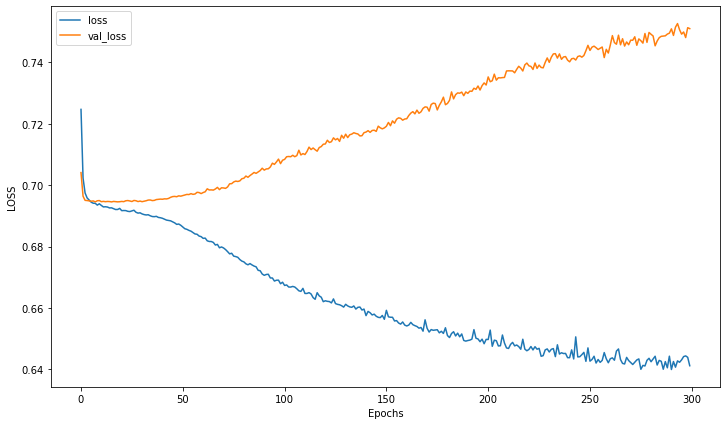

In [53]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

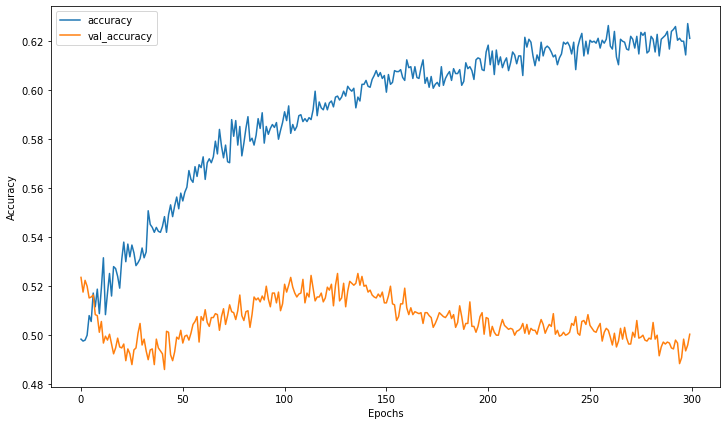

In [54]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Above graphs for RNN shows that there is Underfitting for the Model, it is obvious because RNN is not capable of learning the patterns!***

## GRU

In [55]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = GRU(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

GRUModel = Model(inputShape, LayerStack)
GRUModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
GRUModel.summary()

trainedModel = GRUModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 35, 1)]           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 10)                390       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 2s 22ms/step - loss: 0.6941 - accuracy: 0.5112 - val_loss: 0.6930 - val_accuracy: 0.5036
Epoch 2/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.5088 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 3/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6931 - accuracy: 0.5064 -

79/79 [==============================] - 2s 20ms/step - loss: 0.6899 - accuracy: 0.5280 - val_loss: 0.6950 - val_accuracy: 0.5060
Epoch 54/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6898 - accuracy: 0.5196 - val_loss: 0.6952 - val_accuracy: 0.5036
Epoch 55/300
79/79 [==============================] - 2s 24ms/step - loss: 0.6898 - accuracy: 0.5320 - val_loss: 0.6953 - val_accuracy: 0.4968
Epoch 56/300
79/79 [==============================] - 2s 21ms/step - loss: 0.6900 - accuracy: 0.5316 - val_loss: 0.6953 - val_accuracy: 0.5024
Epoch 57/300
79/79 [==============================] - 2s 20ms/step - loss: 0.6897 - accuracy: 0.5272 - val_loss: 0.6952 - val_accuracy: 0.5012
Epoch 58/300
79/79 [==============================] - 2s 19ms/step - loss: 0.6895 - accuracy: 0.5348 - val_loss: 0.6954 - val_accuracy: 0.5028
Epoch 59/300
79/79 [==============================] - 2s 20ms/step - loss: 0.6895 - accuracy: 0.5348 - val_loss: 0.6955 - val_accuracy: 0.5016
Epoch 60/300

79/79 [==============================] - 1s 18ms/step - loss: 0.6862 - accuracy: 0.5416 - val_loss: 0.6983 - val_accuracy: 0.5096
Epoch 111/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6863 - accuracy: 0.5412 - val_loss: 0.6987 - val_accuracy: 0.5060
Epoch 112/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6862 - accuracy: 0.5420 - val_loss: 0.6988 - val_accuracy: 0.5092
Epoch 113/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6860 - accuracy: 0.5452 - val_loss: 0.6987 - val_accuracy: 0.5100
Epoch 114/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6859 - accuracy: 0.5396 - val_loss: 0.6988 - val_accuracy: 0.5092
Epoch 115/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6857 - accuracy: 0.5452 - val_loss: 0.6990 - val_accuracy: 0.5096
Epoch 116/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6856 - accuracy: 0.5384 - val_loss: 0.6991 - val_accuracy: 0.5076
Epoch 

Epoch 167/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6796 - accuracy: 0.5676 - val_loss: 0.7048 - val_accuracy: 0.5128
Epoch 168/300
79/79 [==============================] - 1s 16ms/step - loss: 0.6792 - accuracy: 0.5636 - val_loss: 0.7053 - val_accuracy: 0.5064
Epoch 169/300
79/79 [==============================] - 1s 19ms/step - loss: 0.6788 - accuracy: 0.5632 - val_loss: 0.7054 - val_accuracy: 0.5056
Epoch 170/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6789 - accuracy: 0.5652 - val_loss: 0.7057 - val_accuracy: 0.5068
Epoch 171/300
79/79 [==============================] - 1s 16ms/step - loss: 0.6786 - accuracy: 0.5708 - val_loss: 0.7057 - val_accuracy: 0.5060
Epoch 172/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6787 - accuracy: 0.5676 - val_loss: 0.7062 - val_accuracy: 0.5068
Epoch 173/300
79/79 [==============================] - 1s 16ms/step - loss: 0.6787 - accuracy: 0.5620 - val_loss: 0.7061 - val_accuracy:

Epoch 224/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6664 - accuracy: 0.5832 - val_loss: 0.7206 - val_accuracy: 0.4960
Epoch 225/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6663 - accuracy: 0.5772 - val_loss: 0.7210 - val_accuracy: 0.5004
Epoch 226/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6662 - accuracy: 0.5784 - val_loss: 0.7208 - val_accuracy: 0.4976
Epoch 227/300
79/79 [==============================] - 2s 19ms/step - loss: 0.6657 - accuracy: 0.5800 - val_loss: 0.7215 - val_accuracy: 0.4996
Epoch 228/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6654 - accuracy: 0.5788 - val_loss: 0.7208 - val_accuracy: 0.5000
Epoch 229/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6647 - accuracy: 0.5812 - val_loss: 0.7213 - val_accuracy: 0.4972
Epoch 230/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6644 - accuracy: 0.5912 - val_loss: 0.7217 - val_accuracy:

Epoch 281/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6419 - accuracy: 0.6264 - val_loss: 0.7457 - val_accuracy: 0.5044
Epoch 282/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6417 - accuracy: 0.6268 - val_loss: 0.7476 - val_accuracy: 0.4964
Epoch 283/300
79/79 [==============================] - 1s 19ms/step - loss: 0.6406 - accuracy: 0.6332 - val_loss: 0.7470 - val_accuracy: 0.5028
Epoch 284/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6407 - accuracy: 0.6348 - val_loss: 0.7477 - val_accuracy: 0.5008
Epoch 285/300
79/79 [==============================] - 1s 17ms/step - loss: 0.6405 - accuracy: 0.6308 - val_loss: 0.7494 - val_accuracy: 0.5024
Epoch 286/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6396 - accuracy: 0.6388 - val_loss: 0.7495 - val_accuracy: 0.4988
Epoch 287/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6391 - accuracy: 0.6336 - val_loss: 0.7509 - val_accuracy:

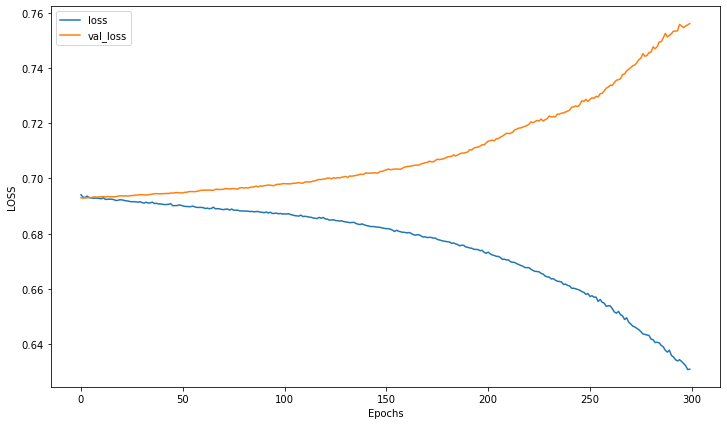

In [56]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

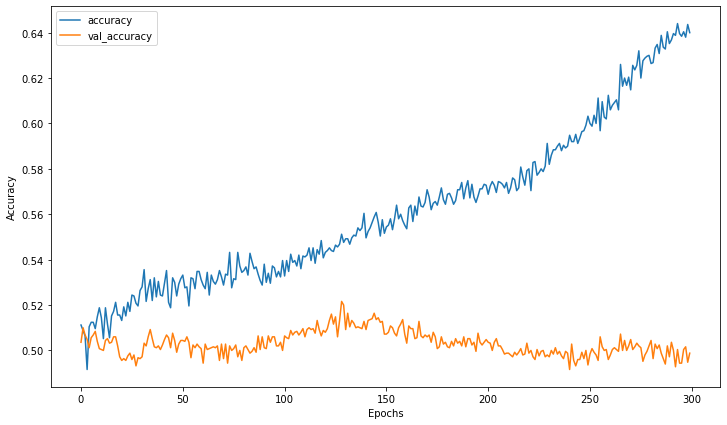

In [57]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Even in the case of GRU, there is underfitting!***

## LSTM

In [58]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = LSTM(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
LSTMModel.summary()

trainedModel = LSTMModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 35, 1)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 2s 25ms/step - loss: 0.6945 - accuracy: 0.4960 - val_loss: 0.6938 - val_accuracy: 0.4948
Epoch 2/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6935 - accuracy: 0.4948 - val_loss: 0.6934 - val_accuracy: 0.4932
Epoch 3/300
79/79 [==============================] - 1s 16ms/step - loss: 0.6933 - accuracy: 0.5008 -

79/79 [==============================] - 1s 15ms/step - loss: 0.6910 - accuracy: 0.5208 - val_loss: 0.6954 - val_accuracy: 0.4936
Epoch 54/300
79/79 [==============================] - 1s 15ms/step - loss: 0.6909 - accuracy: 0.5172 - val_loss: 0.6958 - val_accuracy: 0.4932
Epoch 55/300
79/79 [==============================] - 1s 14ms/step - loss: 0.6908 - accuracy: 0.5140 - val_loss: 0.6956 - val_accuracy: 0.4928
Epoch 56/300
79/79 [==============================] - 1s 15ms/step - loss: 0.6907 - accuracy: 0.5176 - val_loss: 0.6959 - val_accuracy: 0.4888
Epoch 57/300
79/79 [==============================] - 1s 15ms/step - loss: 0.6909 - accuracy: 0.5200 - val_loss: 0.6957 - val_accuracy: 0.4928
Epoch 58/300
79/79 [==============================] - 1s 15ms/step - loss: 0.6908 - accuracy: 0.5168 - val_loss: 0.6961 - val_accuracy: 0.4920
Epoch 59/300
79/79 [==============================] - 1s 18ms/step - loss: 0.6909 - accuracy: 0.5236 - val_loss: 0.6956 - val_accuracy: 0.4960
Epoch 60/300

79/79 [==============================] - 1s 18ms/step - loss: 0.6684 - accuracy: 0.5932 - val_loss: 0.6849 - val_accuracy: 0.5696
Epoch 111/300
79/79 [==============================] - 2s 22ms/step - loss: 0.6658 - accuracy: 0.6064 - val_loss: 0.6857 - val_accuracy: 0.5772
Epoch 112/300
79/79 [==============================] - 2s 20ms/step - loss: 0.6682 - accuracy: 0.5976 - val_loss: 0.6845 - val_accuracy: 0.5740
Epoch 113/300
79/79 [==============================] - 2s 21ms/step - loss: 0.6651 - accuracy: 0.6048 - val_loss: 0.6836 - val_accuracy: 0.5752
Epoch 114/300
79/79 [==============================] - 2s 20ms/step - loss: 0.6635 - accuracy: 0.6084 - val_loss: 0.6798 - val_accuracy: 0.5792
Epoch 115/300
79/79 [==============================] - 2s 20ms/step - loss: 0.6610 - accuracy: 0.6176 - val_loss: 0.6787 - val_accuracy: 0.5812
Epoch 116/300
79/79 [==============================] - 2s 21ms/step - loss: 0.6602 - accuracy: 0.6144 - val_loss: 0.6778 - val_accuracy: 0.5892
Epoch 

Epoch 167/300
79/79 [==============================] - 2s 25ms/step - loss: 0.3747 - accuracy: 0.8420 - val_loss: 0.4132 - val_accuracy: 0.8236
Epoch 168/300
79/79 [==============================] - 2s 22ms/step - loss: 0.3636 - accuracy: 0.8480 - val_loss: 0.4146 - val_accuracy: 0.8240
Epoch 169/300
79/79 [==============================] - 1s 17ms/step - loss: 0.3615 - accuracy: 0.8460 - val_loss: 0.4319 - val_accuracy: 0.8140
Epoch 170/300
79/79 [==============================] - 1s 17ms/step - loss: 0.3583 - accuracy: 0.8520 - val_loss: 0.4034 - val_accuracy: 0.8304
Epoch 171/300
79/79 [==============================] - 2s 19ms/step - loss: 0.3532 - accuracy: 0.8508 - val_loss: 0.3920 - val_accuracy: 0.8332
Epoch 172/300
79/79 [==============================] - 2s 20ms/step - loss: 0.3405 - accuracy: 0.8580 - val_loss: 0.3885 - val_accuracy: 0.8356
Epoch 173/300
79/79 [==============================] - 1s 17ms/step - loss: 0.3366 - accuracy: 0.8652 - val_loss: 0.3836 - val_accuracy:

Epoch 224/300
79/79 [==============================] - 2s 21ms/step - loss: 0.1625 - accuracy: 0.9428 - val_loss: 0.2224 - val_accuracy: 0.9144
Epoch 225/300
79/79 [==============================] - 3s 32ms/step - loss: 0.1610 - accuracy: 0.9404 - val_loss: 0.2174 - val_accuracy: 0.9196
Epoch 226/300
79/79 [==============================] - 2s 29ms/step - loss: 0.1562 - accuracy: 0.9432 - val_loss: 0.2174 - val_accuracy: 0.9196
Epoch 227/300
79/79 [==============================] - 2s 28ms/step - loss: 0.1537 - accuracy: 0.9444 - val_loss: 0.2242 - val_accuracy: 0.9180
Epoch 228/300
79/79 [==============================] - 2s 27ms/step - loss: 0.1698 - accuracy: 0.9344 - val_loss: 0.2150 - val_accuracy: 0.9180
Epoch 229/300
79/79 [==============================] - 2s 19ms/step - loss: 0.1521 - accuracy: 0.9432 - val_loss: 0.2098 - val_accuracy: 0.9204
Epoch 230/300
79/79 [==============================] - 1s 19ms/step - loss: 0.1484 - accuracy: 0.9452 - val_loss: 0.2083 - val_accuracy:

Epoch 281/300
79/79 [==============================] - 2s 19ms/step - loss: 0.0676 - accuracy: 0.9748 - val_loss: 0.1233 - val_accuracy: 0.9564
Epoch 282/300
79/79 [==============================] - 2s 20ms/step - loss: 0.0696 - accuracy: 0.9728 - val_loss: 0.1255 - val_accuracy: 0.9568
Epoch 283/300
79/79 [==============================] - 2s 20ms/step - loss: 0.0637 - accuracy: 0.9760 - val_loss: 0.1342 - val_accuracy: 0.9512
Epoch 284/300
79/79 [==============================] - 2s 21ms/step - loss: 0.0649 - accuracy: 0.9764 - val_loss: 0.1756 - val_accuracy: 0.9440
Epoch 285/300
79/79 [==============================] - 2s 21ms/step - loss: 0.0658 - accuracy: 0.9740 - val_loss: 0.1299 - val_accuracy: 0.9564
Epoch 286/300
79/79 [==============================] - 2s 20ms/step - loss: 0.0687 - accuracy: 0.9756 - val_loss: 0.1294 - val_accuracy: 0.9520
Epoch 287/300
79/79 [==============================] - 2s 21ms/step - loss: 0.0721 - accuracy: 0.9716 - val_loss: 0.1251 - val_accuracy:

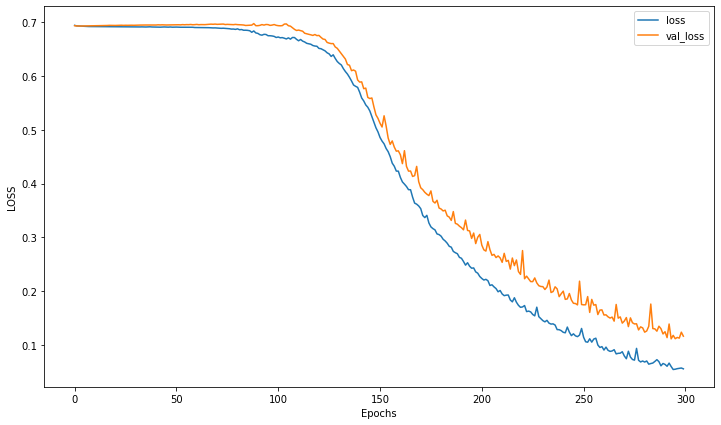

In [59]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

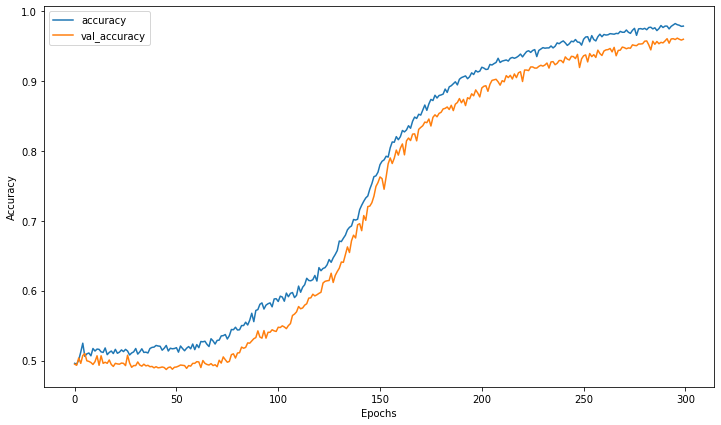

In [60]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***This clearly depicts the power of LSTM & their capability that they ar far better than the other competitors!***

# Congratulations! Now, a very important concept is explained